# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [2]:
def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=30, color='green')
    vis.show()

In [3]:
def draw_line(points_left, points_mid, points_right):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=30, color=['green'])
    vis.add_point(points_mid, s=30, color=['purple'])
    vis.add_point(points_right, s=30, color=['orange'])
    vis.show()

In [4]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='green')
    vis.add_point((6, 6), s=30, color='red')
    vis.add_point((7, 4), s=30, color='purple')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

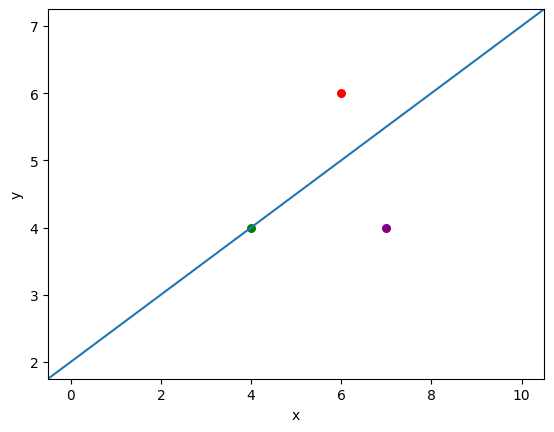

In [5]:
draw_example()

Do tego celu potrzebujemy wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

In [6]:
def generate_uniform_points(left, right, n = 10 ** 5):
    """
    Funkcja generuje równomiernie n punktów na kwadratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych, np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    tab=[(np.random.uniform(left,right),np.random.uniform(left,right)) for _ in range(n)]
    return tab

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $\left[-1000,1000\right]$.

In [7]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty.

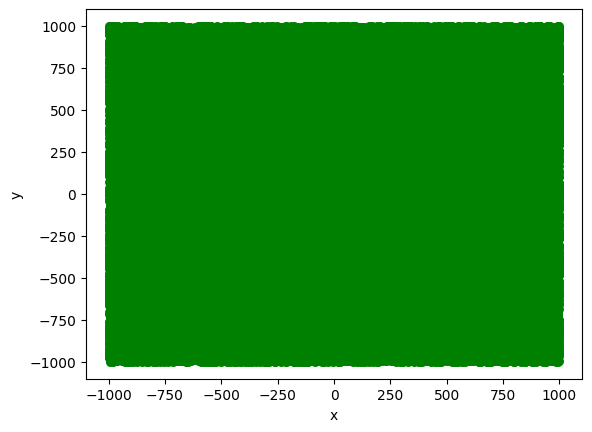

In [8]:
draw_points(points_a)

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $\left[-10^{14},10^{14}\right]$.

In [9]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

Zwizualizuj wygenerowane punkty.

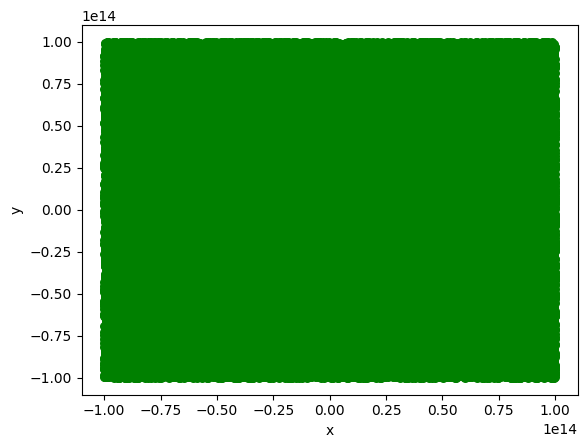

In [10]:
draw_points(points_b)

In [11]:
def generate_circle_points(O, R, n = 1000):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu 
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    tab=[None for _ in range(n)]
    for i in range(n):
        angle=np.random.random()*2*np.pi
        tab[i]=(O[0]+R*np.sin(angle),O[1]+R*np.cos(angle))
    return tab

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

In [12]:
points_c = generate_circle_points((0, 0), 100)

Zwizualizuj wygenerowane punkty.

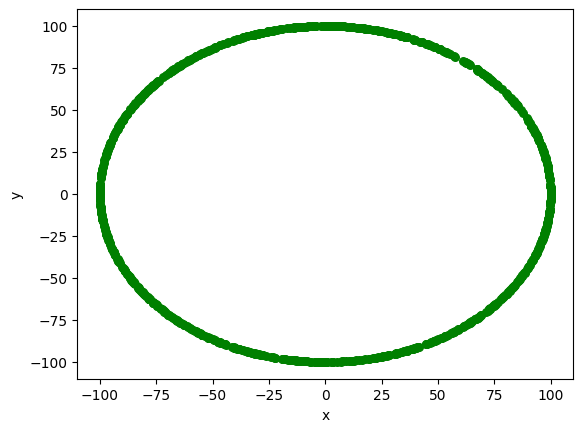

In [13]:
draw_points(points_c)

In [14]:
def generate_collinear_points(a, b, n=1000):
    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na prostej wyznaczonej przez punkty a i b
    :param a: krotka współrzędnych oznaczająca punkt a
    :param b: krotka współrzędnych oznaczająca punkt b
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    vector=(b[0]-a[0],b[1]-a[1])
    y_move=0.05 #dla tego konkretnego przypadku
    tab=[None for _ in range(n)]
    for i in range(n):
        multiplier=np.random.uniform(-500,500) #dla tego konkretnego przypadku
        tab[i]=(multiplier*vector[0],y_move+multiplier*vector[1])
    return tab

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $\langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$.

In [15]:
points_d= generate_collinear_points((-1.0, 0.0), (1.0,0.1))

Zwizualizuj wygenerowane punkty.

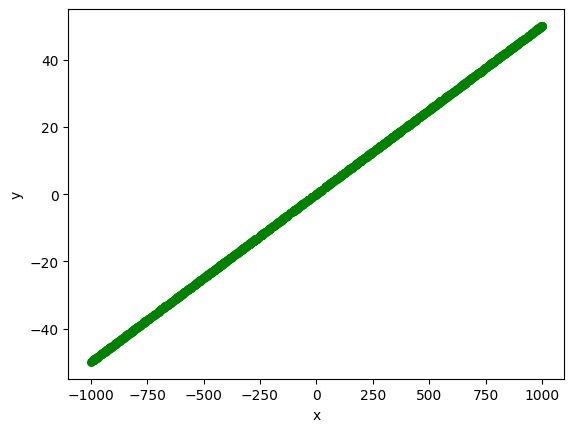

In [16]:
draw_points(points_d)

Przeprowadź test poprawności powyższych funkcji:

In [17]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.188s


# Po której stronie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której stronie prostej znajduje się punkt, jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tę macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$.  
Dlaczego wiemy, że po obliczeniu wyznacznika podanego powyżej będziemy wiedzieć, po której stronie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie samo, co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie to zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej, jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porównanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej linii.

In [18]:
def mat_det_3x3(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return a[0]*b[1]+a[1]*c[0]+b[0]*c[1]-b[1]*c[0]-a[0]*c[1]-a[1]*b[0]

In [19]:
def mat_det_3x3_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    matrix=[[a[0],a[1],1],[b[0],b[1],1],[c[0],c[1],1]]
    return np.linalg.det(matrix)

In [20]:
def mat_det_2x2(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return (a[0]-c[0])*(b[1]-c[1])-(a[1]-c[1])*(b[0]-c[0])

In [21]:
def mat_det_2x2_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    matrix=[[a[0]-c[0],a[1]-c[1]],[b[0]-c[0],b[1]-c[1]]]
    return np.linalg.det(matrix)

Przetestujmy napisane powyżej funkcje.

In [22]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.000s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifikuje punkty względem prostej wyznaczonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$).

In [23]:
def categorize_points(points, a, b, mat_det_func, eps):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostej
    """
    left=[]
    on_line=[]
    right=[]
    n=len(points)
    for i in range(n):
        det=mat_det_func(a,b,points[i])
        if det>eps: left.append(points[i])
        elif det<-eps: right.append(points[i])
        else: on_line.append(points[i])
    return left,on_line,right

In [24]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe. Dla każdego zbioru punktów
przedstawię wyniki testując różną precyzję obliczeń, tolerancję dla zera i funkcje obliczające wyznaczniki.

49941 50059 0


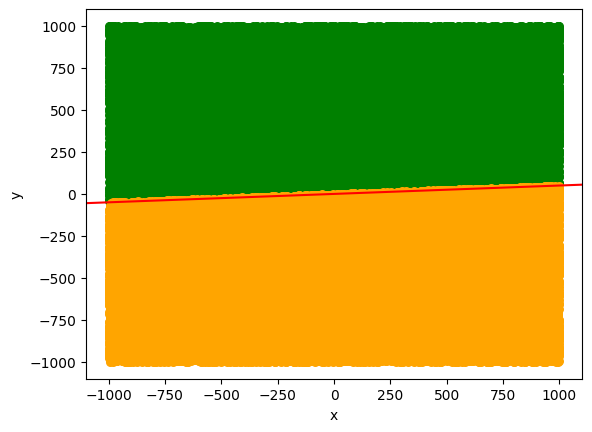

In [102]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -12)
print(len(classified_points_a_left),len(classified_points_a_right),len(classified_points_a_mid))
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

49941 50059 0


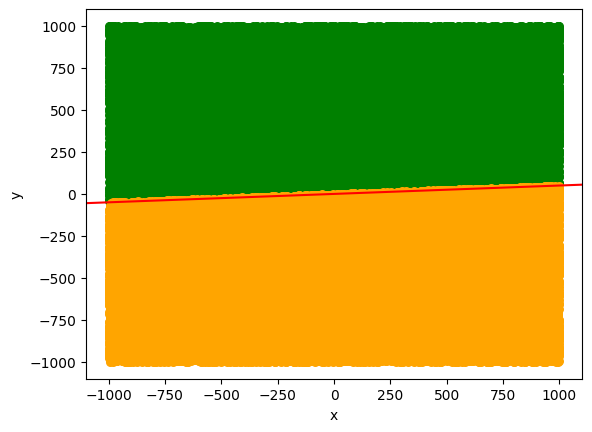

In [103]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3_lib, 10 ** -12)
print(len(classified_points_a_left),len(classified_points_a_right),len(classified_points_a_mid))
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

49941 50059 0


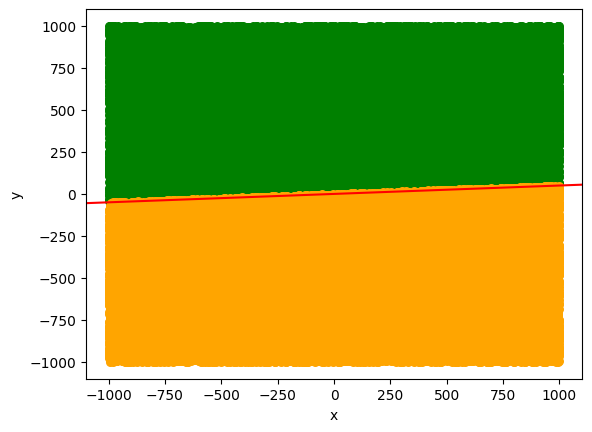

In [104]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2, 10 ** -12)
print(len(classified_points_a_left),len(classified_points_a_right),len(classified_points_a_mid))
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

49941 50059 0


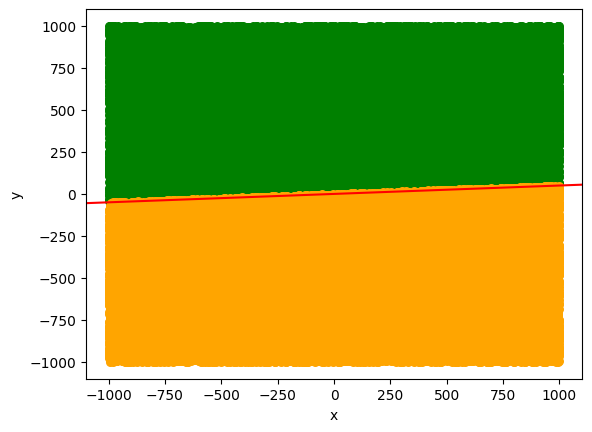

In [105]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10 ** -12)
print(len(classified_points_a_left),len(classified_points_a_right),len(classified_points_a_mid))
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

50115 49885 0


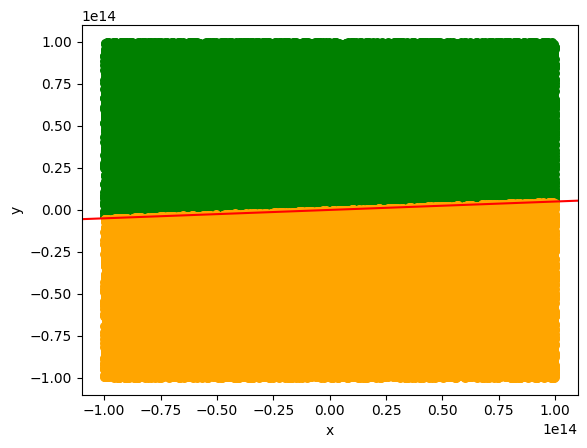

In [119]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3, 10 ** -12)
print(len(classified_points_b_left),len(classified_points_b_right),len(classified_points_b_mid))
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

50115 49885 0


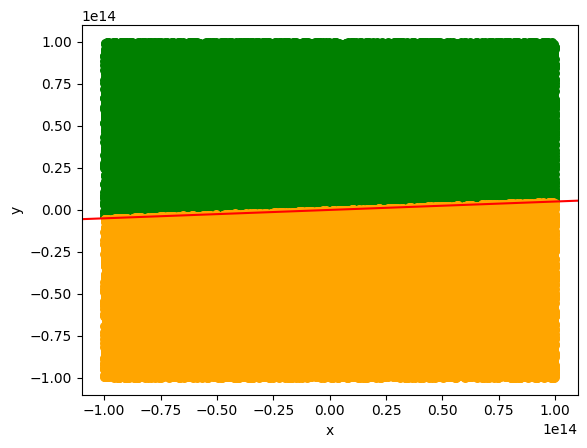

In [120]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -12)
print(len(classified_points_b_left),len(classified_points_b_right),len(classified_points_b_mid))
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

50113 49884 3


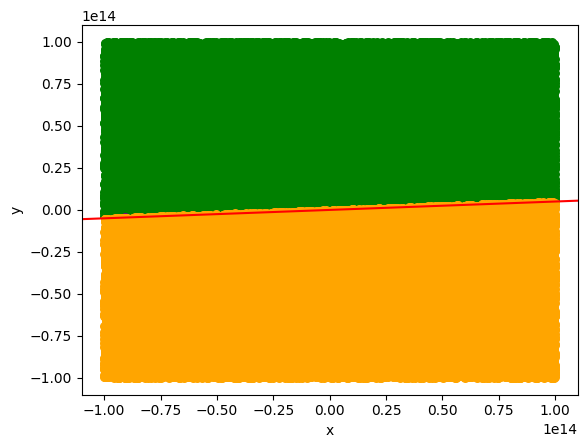

In [121]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2, 10 ** -12)
print(len(classified_points_b_left),len(classified_points_b_right),len(classified_points_b_mid))
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

50113 49884 3


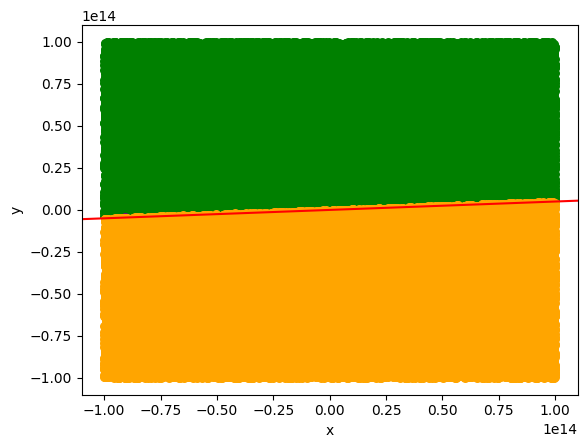

In [122]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2_lib, 10 ** -12)
print(len(classified_points_b_left),len(classified_points_b_right),len(classified_points_b_mid))
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

480 520 0


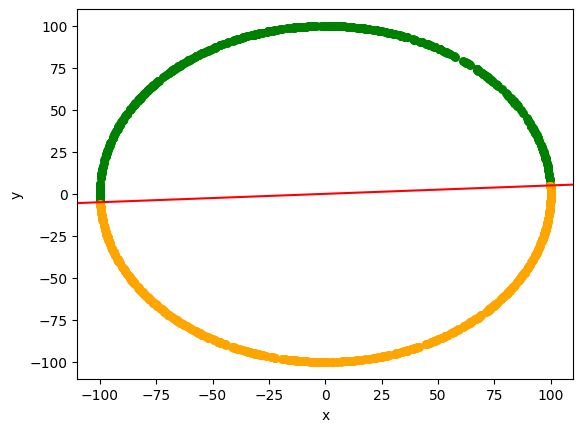

In [135]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3, 10 ** -12)
print(len(classified_points_c_left),len(classified_points_c_right),len(classified_points_c_mid))
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

480 520 0


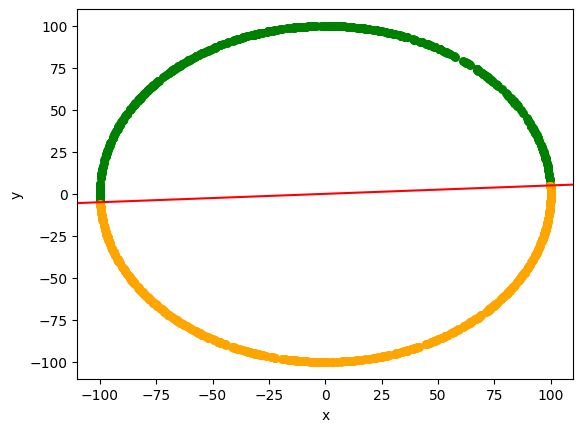

In [136]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3_lib, 10 ** -12)
print(len(classified_points_c_left),len(classified_points_c_right),len(classified_points_c_mid))
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

480 520 0


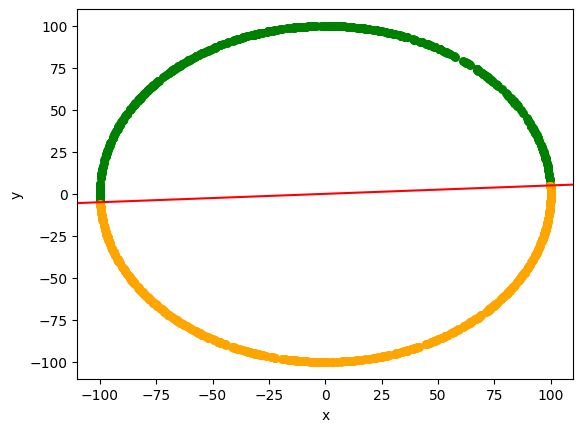

In [137]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -12)
print(len(classified_points_c_left),len(classified_points_c_right),len(classified_points_c_mid))
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

480 520 0


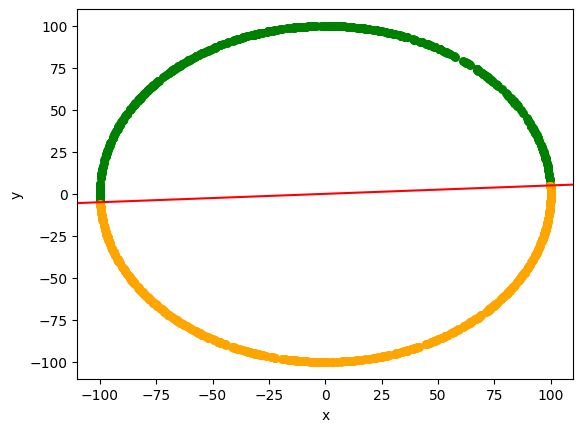

In [138]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2_lib, 10 ** -12)
print(len(classified_points_c_left),len(classified_points_c_right),len(classified_points_c_mid))
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

0 0 1000


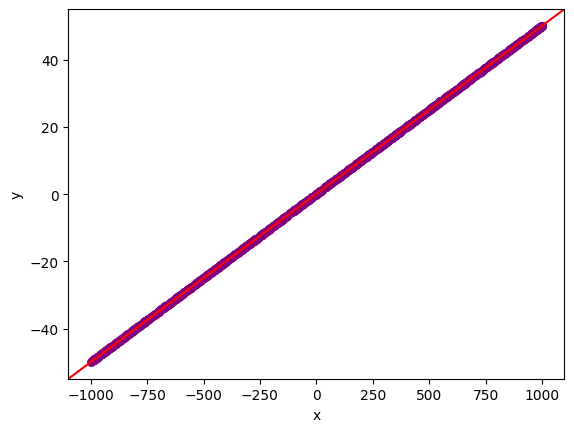

In [152]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3, 10 ** -12)
print(len(classified_points_d_left),len(classified_points_d_right),len(classified_points_d_mid))
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

0 0 1000


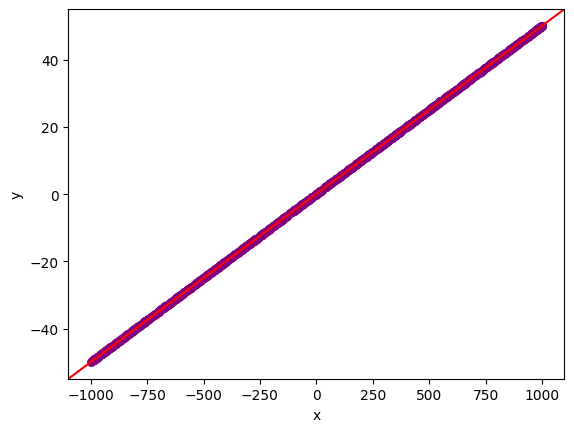

In [153]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3_lib, 10 ** -12)
print(len(classified_points_d_left),len(classified_points_d_right),len(classified_points_d_mid))
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

77 84 839


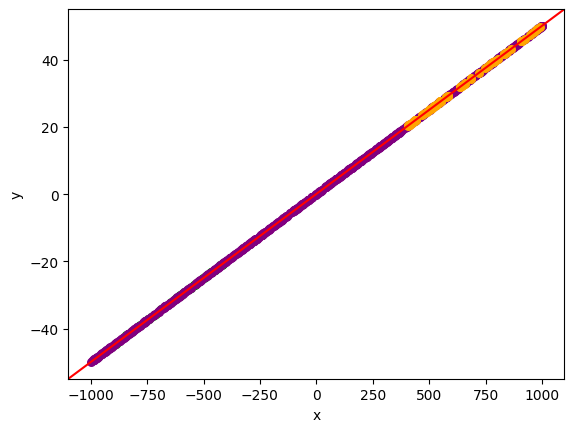

In [154]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2, 10 ** -12)
print(len(classified_points_d_left),len(classified_points_d_right),len(classified_points_d_mid))
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

103 99 798


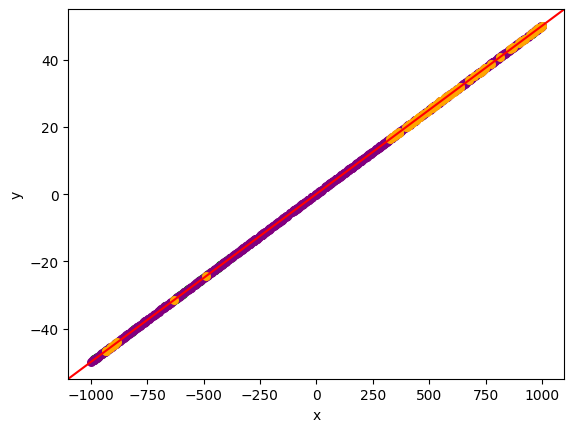

In [155]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -12)
print(len(classified_points_d_left),len(classified_points_d_right),len(classified_points_d_mid))
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się na mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

In [41]:
points_a_float32 = np.float32(points_a)

Porównajmy wyniki klasyfikacji dla współrzędnych punktów o zmiejszonej precyzji floata.

49941 50059 0


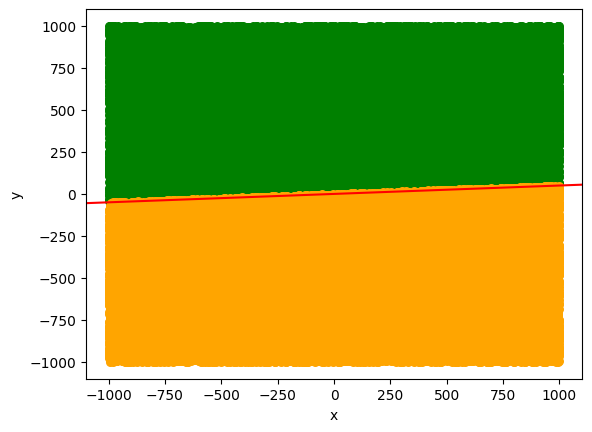

In [94]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a_float32, a, b, mat_det_3x3, 10 ** -12)
print(len(classified_points_a_left),len(classified_points_a_right),len(classified_points_a_mid))
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

49941 50059 0


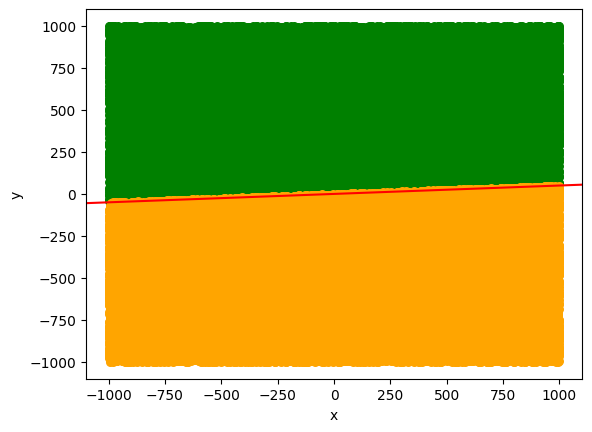

In [95]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a_float32, a, b, mat_det_3x3_lib, 10 ** -12)
print(len(classified_points_a_left),len(classified_points_a_right),len(classified_points_a_mid))
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

49941 50059 0


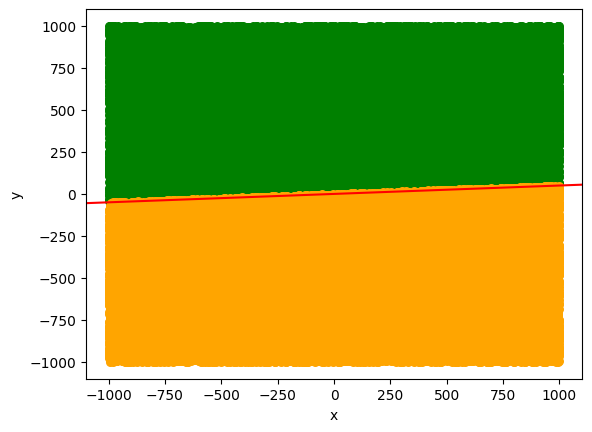

In [96]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a_float32, a, b, mat_det_2x2, 10 ** -12)
print(len(classified_points_a_left),len(classified_points_a_right),len(classified_points_a_mid))
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

49941 50059 0


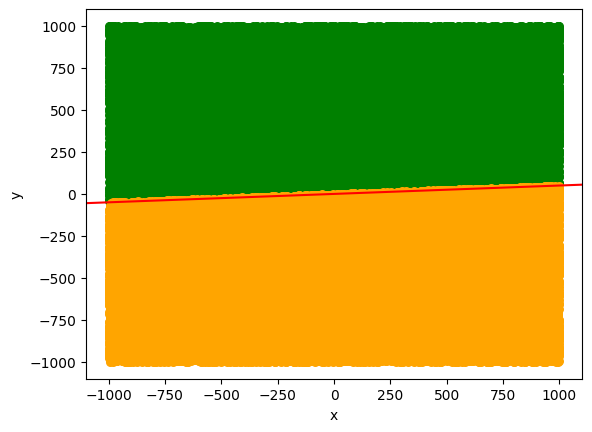

In [97]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a_float32, a, b, mat_det_2x2_lib, 10 ** -12)
print(len(classified_points_a_left),len(classified_points_a_right),len(classified_points_a_mid))
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

50115 49885 0


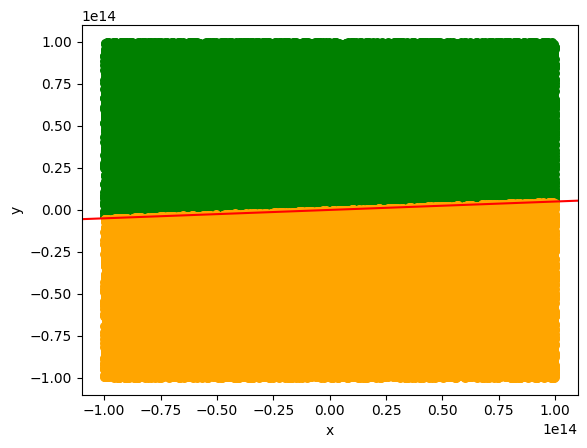

In [111]:
points_b_float32 = np.float32(points_b)
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b_float32, a, b, mat_det_3x3, 10 ** -12)
print(len(classified_points_b_left),len(classified_points_b_right),len(classified_points_b_mid))
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

50115 49885 0


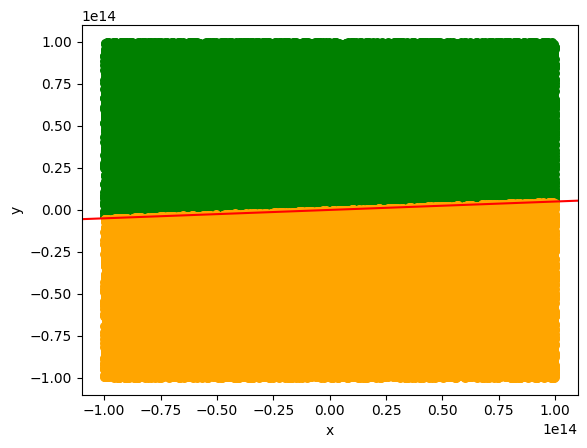

In [112]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b_float32, a, b, mat_det_3x3_lib, 10 ** -12)
print(len(classified_points_b_left),len(classified_points_b_right),len(classified_points_b_mid))
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

50113 49884 3


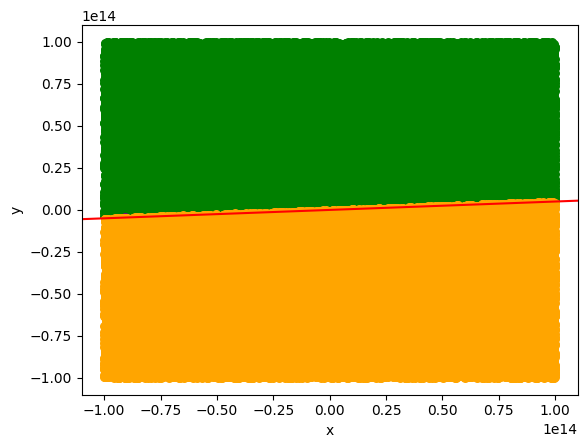

In [113]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b_float32, a, b, mat_det_2x2, 10 ** -12)
print(len(classified_points_b_left),len(classified_points_b_right),len(classified_points_b_mid))
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

50113 49883 4


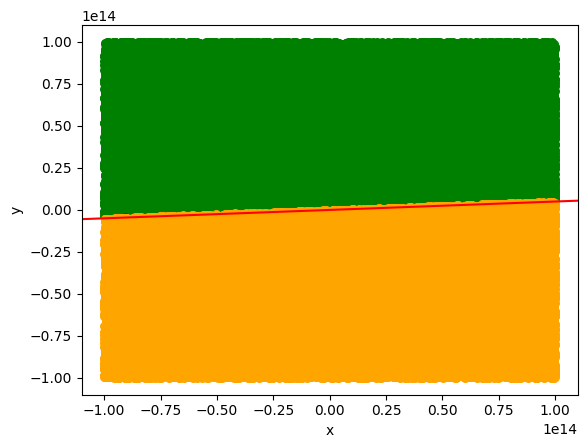

In [114]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b_float32, a, b, mat_det_2x2_lib, 10 ** -12)
print(len(classified_points_b_left),len(classified_points_b_right),len(classified_points_b_mid))
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

480 520 0


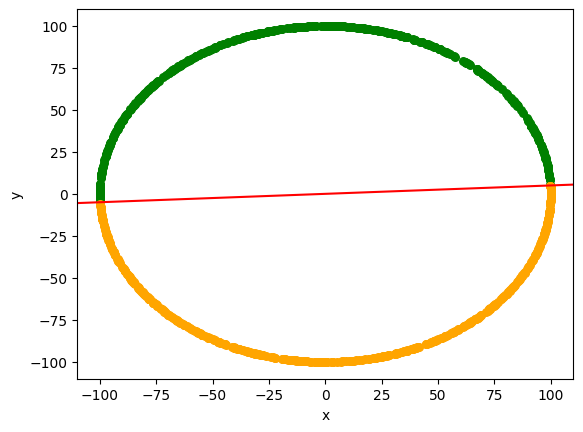

In [127]:
points_c_float32 = np.float32(points_c)
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c_float32, a, b, mat_det_3x3, 10 ** -12)
print(len(classified_points_c_left),len(classified_points_c_right),len(classified_points_c_mid))
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

480 520 0


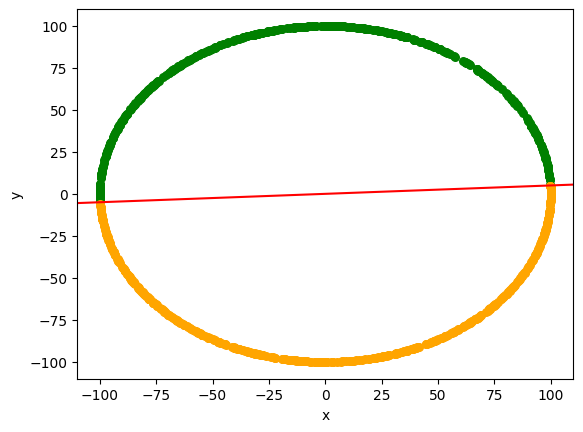

In [128]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c_float32, a, b, mat_det_3x3_lib, 10 ** -12)
print(len(classified_points_c_left),len(classified_points_c_right),len(classified_points_c_mid))
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

480 520 0


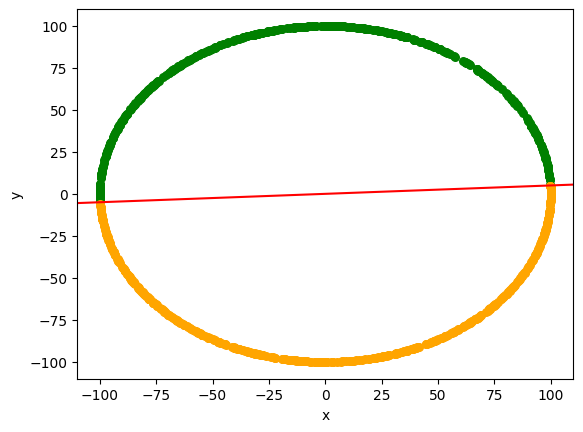

In [129]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c_float32, a, b, mat_det_2x2, 10 ** -12)
print(len(classified_points_c_left),len(classified_points_c_right),len(classified_points_c_mid))
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

480 520 0


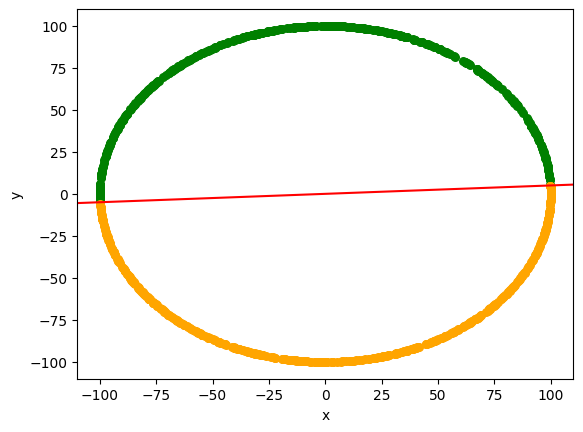

In [130]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c_float32, a, b, mat_det_2x2_lib, 10 ** -12)
print(len(classified_points_c_left),len(classified_points_c_right),len(classified_points_c_mid))
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

419 400 181


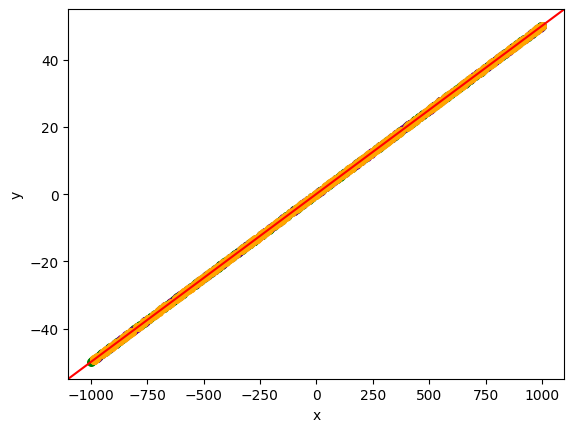

In [144]:
points_d_float32 = np.float32(points_d)
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d_float32, a, b, mat_det_3x3, 10 ** -12)
print(len(classified_points_d_left),len(classified_points_d_right),len(classified_points_d_mid))
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

419 400 181


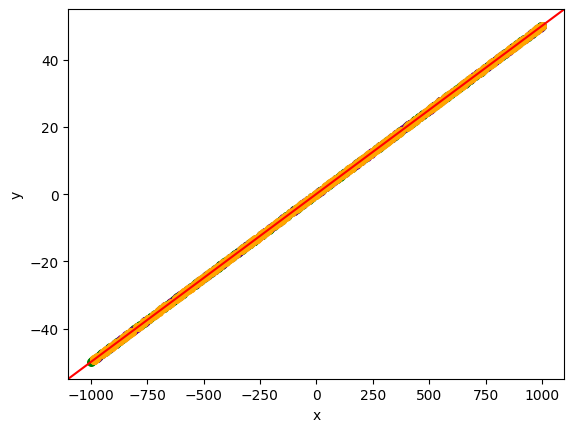

In [145]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d_float32, a, b, mat_det_3x3_lib, 10 ** -12)
print(len(classified_points_d_left),len(classified_points_d_right),len(classified_points_d_mid))
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

419 400 181


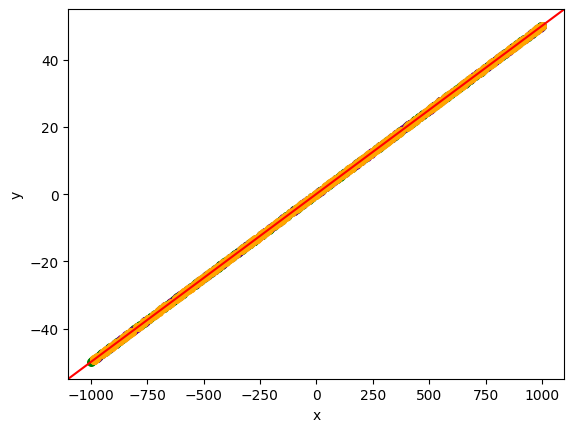

In [146]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d_float32, a, b, mat_det_2x2, 10 ** -12)
print(len(classified_points_d_left),len(classified_points_d_right),len(classified_points_d_mid))
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

435 420 145


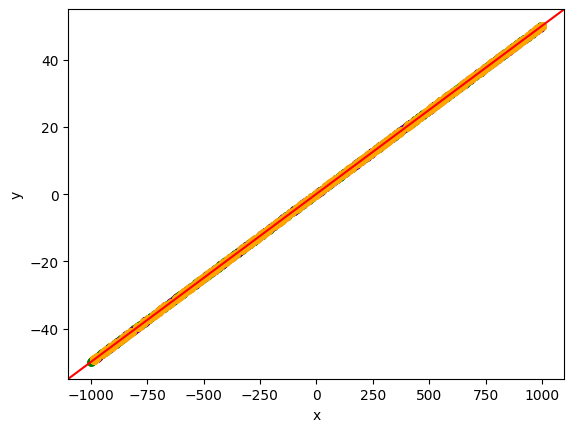

In [147]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d_float32, a, b, mat_det_2x2_lib, 10 ** -12)
print(len(classified_points_d_left),len(classified_points_d_right),len(classified_points_d_mid))
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

---
Teraz sprawdźmy rezultat dla zwiększonej tolerancji dla zera. 
Wcześniej wynosiła ona 10$^{-12}$, teraz zwiększam ją do 10$^{-8}$.

49941 50059 0


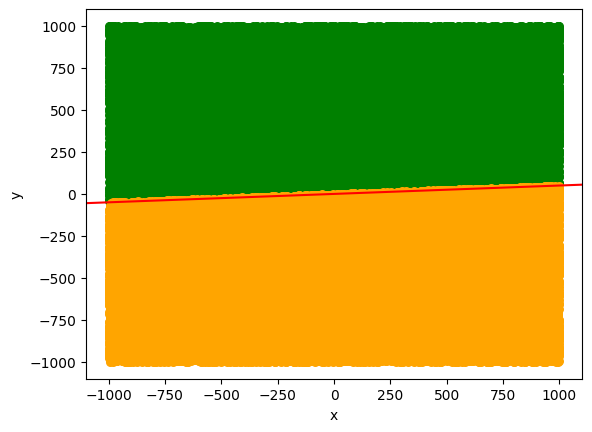

In [98]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -8)
print(len(classified_points_a_left),len(classified_points_a_right),len(classified_points_a_mid))
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

49941 50059 0


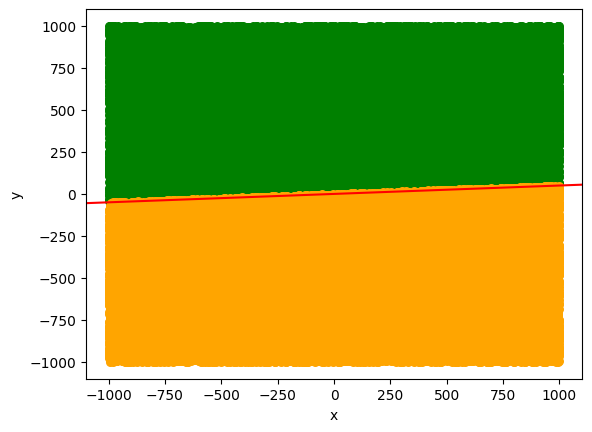

In [99]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3_lib, 10 ** -8)
print(len(classified_points_a_left),len(classified_points_a_right),len(classified_points_a_mid))
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

49941 50059 0


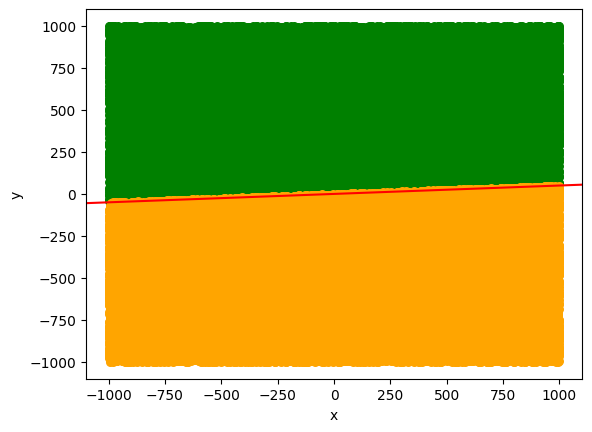

In [100]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2, 10 ** -8)
print(len(classified_points_a_left),len(classified_points_a_right),len(classified_points_a_mid))
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

49941 50059 0


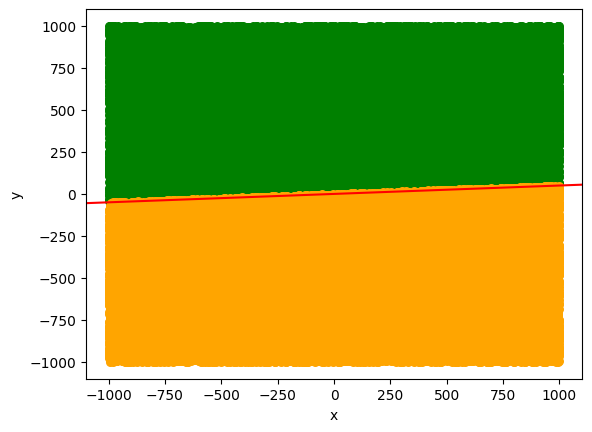

In [101]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10 ** -8)
print(len(classified_points_a_left),len(classified_points_a_right),len(classified_points_a_mid))
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

50115 49885 0


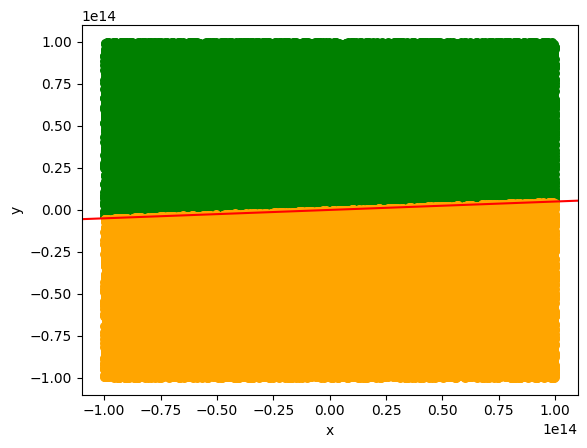

In [115]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3, 10 ** -8)
print(len(classified_points_b_left),len(classified_points_b_right),len(classified_points_b_mid))
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

50115 49885 0


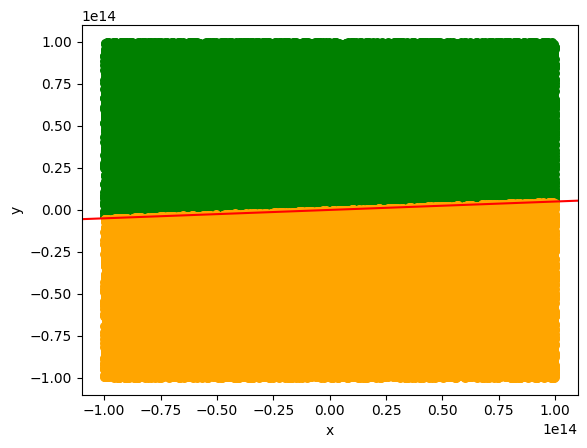

In [116]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -8)
print(len(classified_points_b_left),len(classified_points_b_right),len(classified_points_b_mid))
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

50113 49884 3


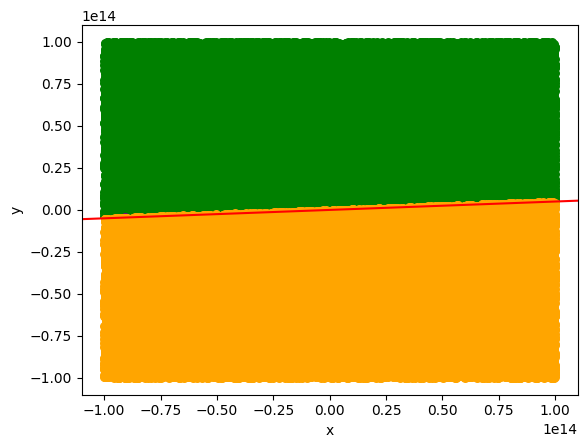

In [117]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2, 10 ** -8)
print(len(classified_points_b_left),len(classified_points_b_right),len(classified_points_b_mid))
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

50113 49884 3


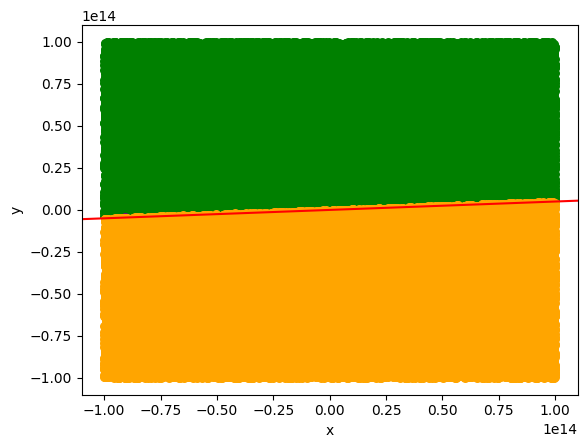

In [118]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2_lib, 10 ** -8)
print(len(classified_points_b_left),len(classified_points_b_right),len(classified_points_b_mid))
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

480 520 0


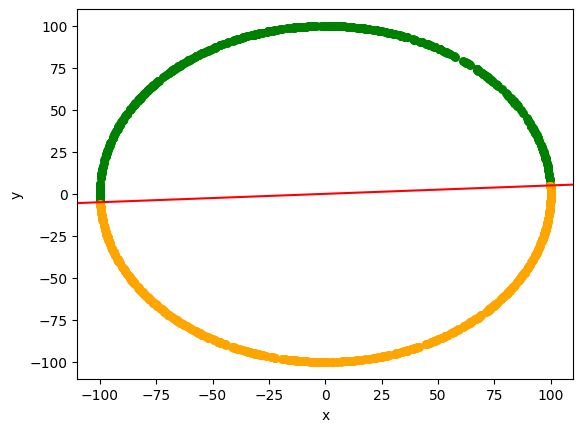

In [131]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3, 10 ** -8)
print(len(classified_points_c_left),len(classified_points_c_right),len(classified_points_c_mid))
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

480 520 0


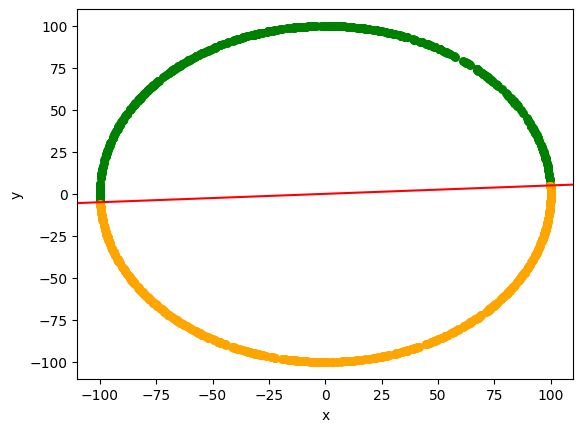

In [132]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3_lib, 10 ** -8)
print(len(classified_points_c_left),len(classified_points_c_right),len(classified_points_c_mid))
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

480 520 0


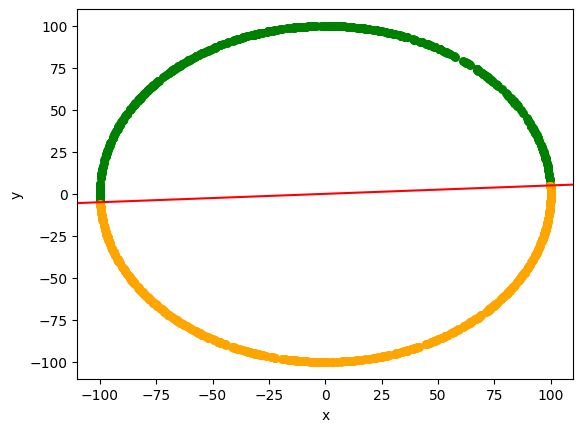

In [133]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -8)
print(len(classified_points_c_left),len(classified_points_c_right),len(classified_points_c_mid))
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

480 520 0


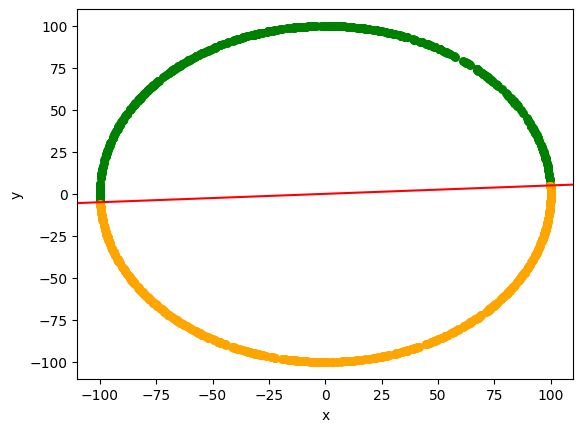

In [134]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2_lib, 10 ** -8)
print(len(classified_points_c_left),len(classified_points_c_right),len(classified_points_c_mid))
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

0 0 1000


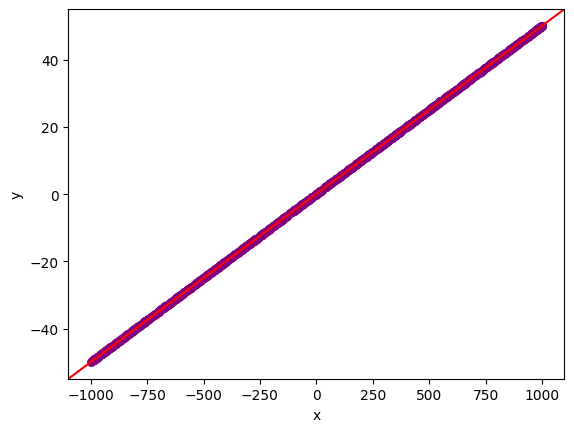

In [148]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3, 10 ** -8)
print(len(classified_points_d_left),len(classified_points_d_right),len(classified_points_d_mid))
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

0 0 1000


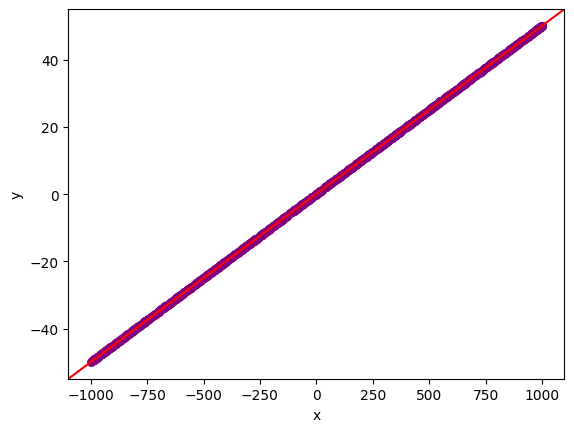

In [149]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3_lib, 10 ** -8)
print(len(classified_points_d_left),len(classified_points_d_right),len(classified_points_d_mid))
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

0 0 1000


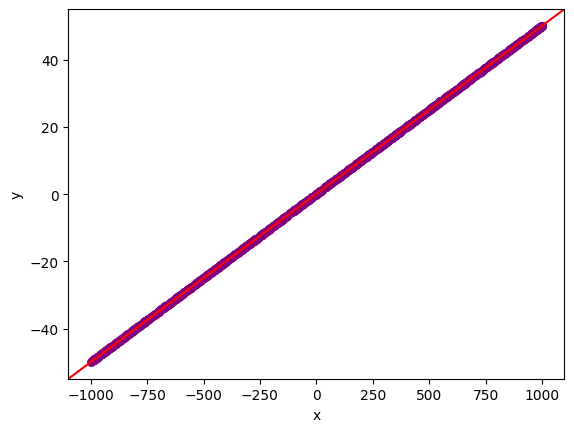

In [150]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2, 10 ** -8)
print(len(classified_points_d_left),len(classified_points_d_right),len(classified_points_d_mid))
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

0 0 1000


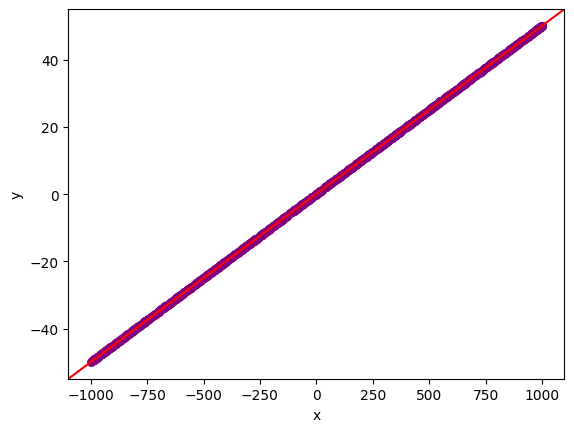

In [151]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -8)
print(len(classified_points_d_left),len(classified_points_d_right),len(classified_points_d_mid))
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

Analogicznie dla mniejszej precyzji floata (przy zwiększonej tolerancji):

49941 50059 0


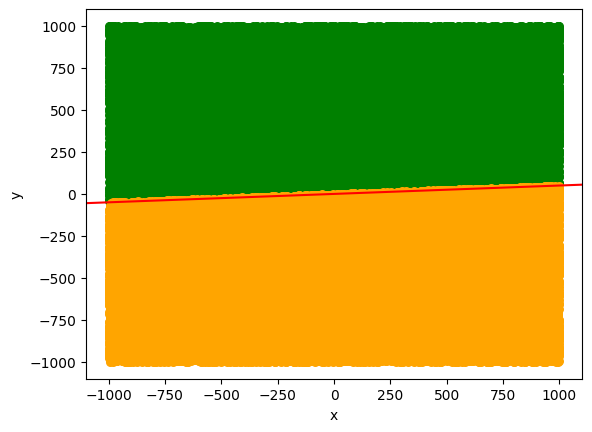

In [74]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a_float32, a, b, mat_det_3x3, 10 ** -8)
print(len(classified_points_a_left),len(classified_points_a_right),len(classified_points_a_mid))
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

49941 50059 0


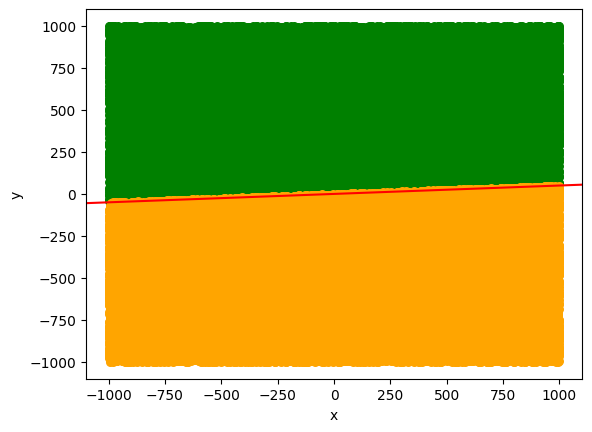

In [90]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a_float32, a, b, mat_det_3x3_lib, 10 ** -8)
print(len(classified_points_a_left),len(classified_points_a_right),len(classified_points_a_mid))
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

49941 50059 0


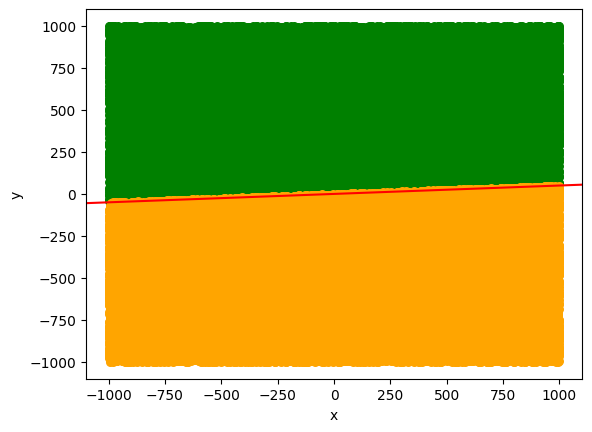

In [91]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a_float32, a, b, mat_det_2x2, 10 ** -8)
print(len(classified_points_a_left),len(classified_points_a_right),len(classified_points_a_mid))
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

49941 50059 0


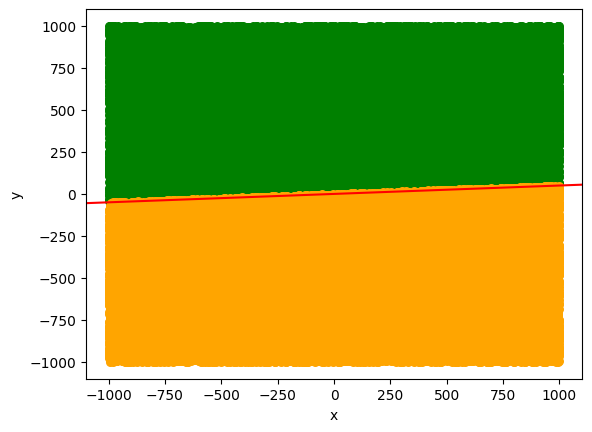

In [92]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a_float32, a, b, mat_det_2x2_lib, 10 ** -8)
print(len(classified_points_a_left),len(classified_points_a_right),len(classified_points_a_mid))
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

50115 49885 0


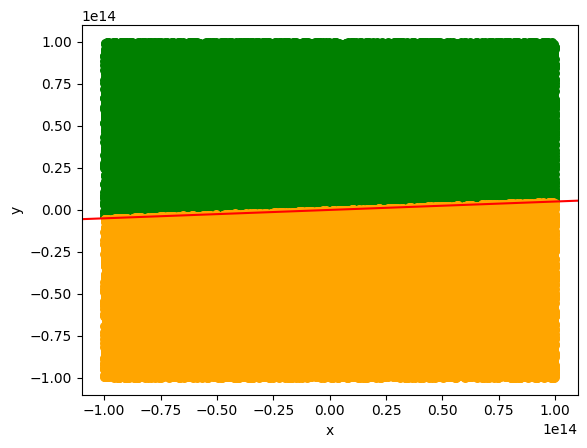

In [107]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b_float32, a, b, mat_det_3x3, 10 ** -8)
print(len(classified_points_b_left),len(classified_points_b_right),len(classified_points_b_mid))
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

50115 49885 0


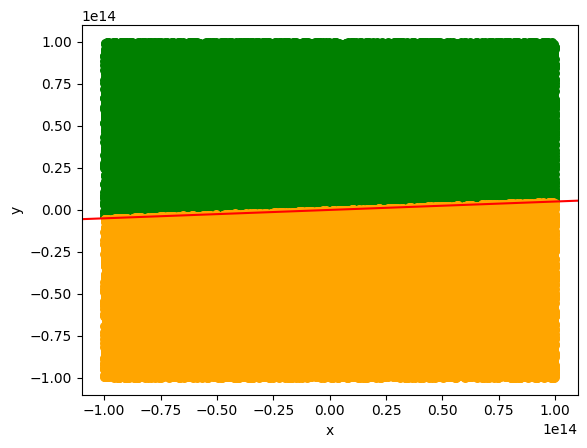

In [108]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b_float32, a, b, mat_det_3x3_lib, 10 ** -8)
print(len(classified_points_b_left),len(classified_points_b_right),len(classified_points_b_mid))
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

50113 49884 3


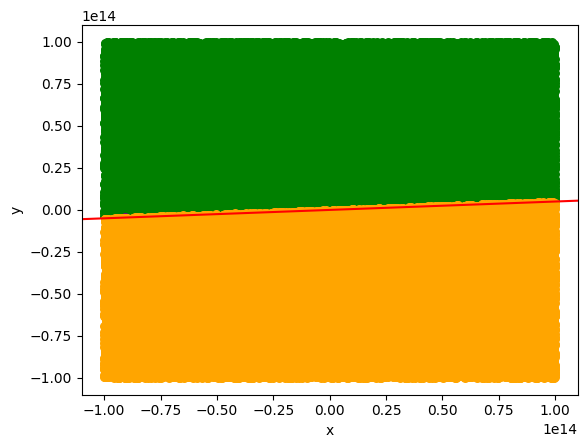

In [109]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b_float32, a, b, mat_det_2x2, 10 ** -8)
print(len(classified_points_b_left),len(classified_points_b_right),len(classified_points_b_mid))
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

50113 49883 4


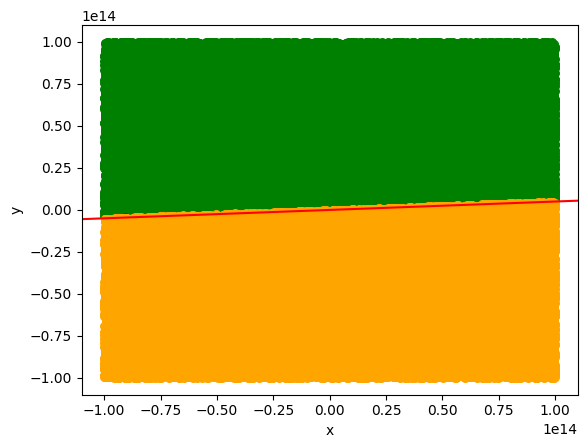

In [110]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b_float32, a, b, mat_det_2x2_lib, 10 ** -8)
print(len(classified_points_b_left),len(classified_points_b_right),len(classified_points_b_mid))
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

480 520 0


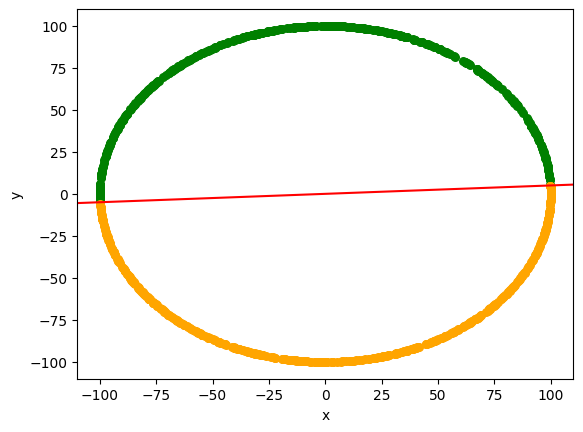

In [123]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c_float32, a, b, mat_det_3x3, 10 ** -8)
print(len(classified_points_c_left),len(classified_points_c_right),len(classified_points_c_mid))
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

480 520 0


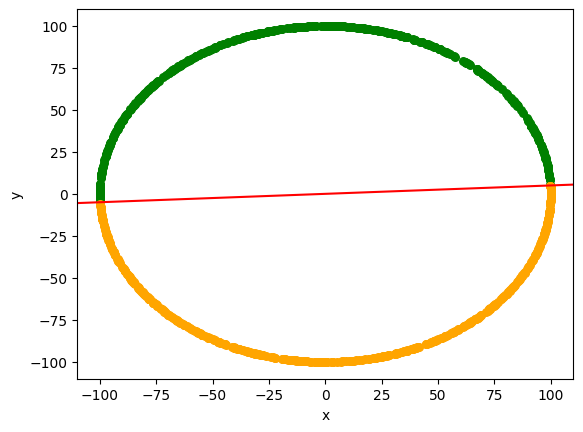

In [124]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c_float32, a, b, mat_det_3x3_lib, 10 ** -8)
print(len(classified_points_c_left),len(classified_points_c_right),len(classified_points_c_mid))
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

480 520 0


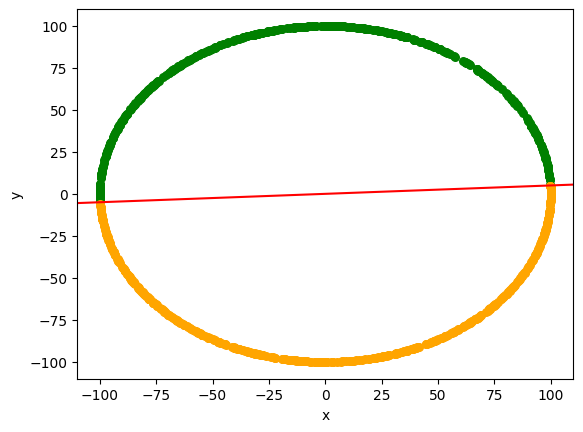

In [125]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c_float32, a, b, mat_det_2x2, 10 ** -8)
print(len(classified_points_c_left),len(classified_points_c_right),len(classified_points_c_mid))
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

480 520 0


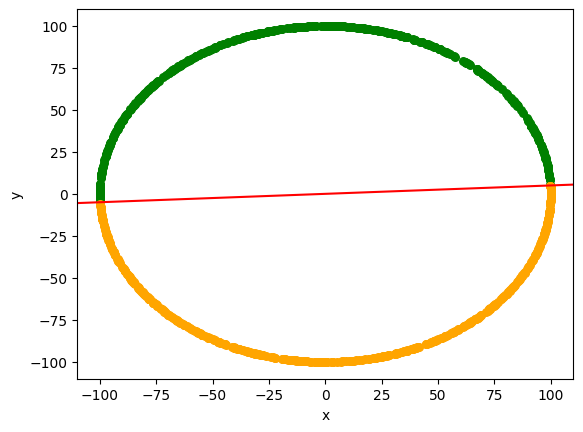

In [126]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c_float32, a, b, mat_det_2x2_lib, 10 ** -8)
print(len(classified_points_c_left),len(classified_points_c_right),len(classified_points_c_mid))
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

419 397 184


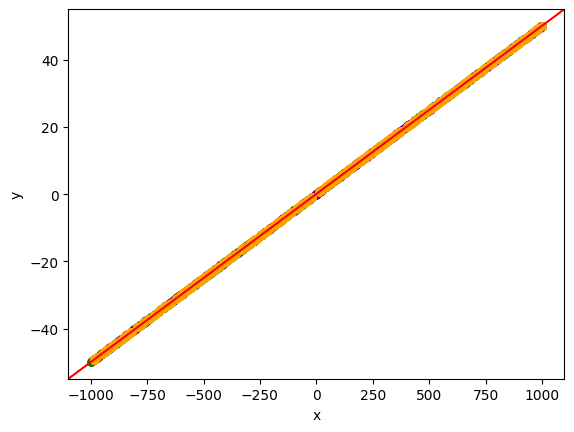

In [139]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d_float32, a, b, mat_det_3x3, 10 ** -8)
print(len(classified_points_d_left),len(classified_points_d_right),len(classified_points_d_mid))
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

419 397 184


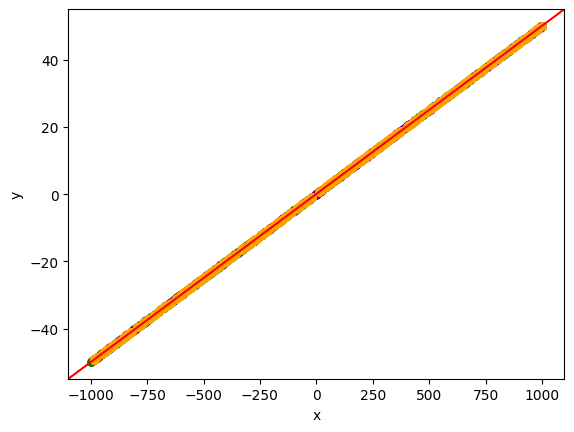

In [141]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d_float32, a, b, mat_det_3x3_lib, 10 ** -8)
print(len(classified_points_d_left),len(classified_points_d_right),len(classified_points_d_mid))
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

419 397 184


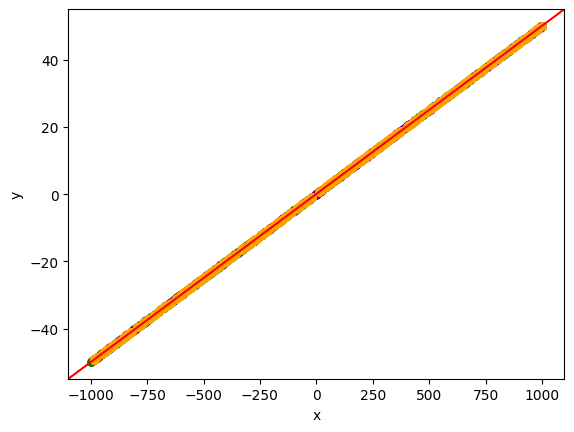

In [142]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d_float32, a, b, mat_det_2x2, 10 ** -8)
print(len(classified_points_d_left),len(classified_points_d_right),len(classified_points_d_mid))
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

419 397 184


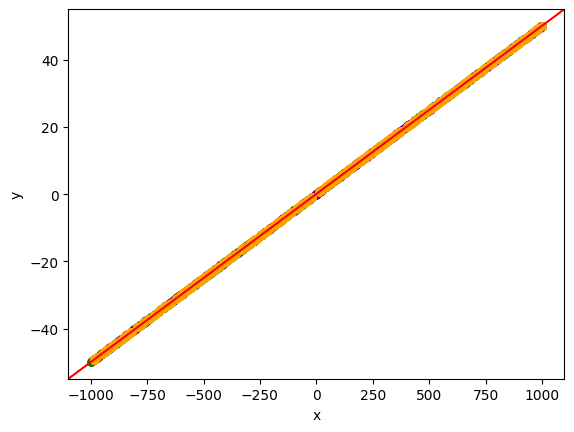

In [143]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d_float32, a, b, mat_det_2x2_lib, 10 ** -8)
print(len(classified_points_d_left),len(classified_points_d_right),len(classified_points_d_mid))
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)